In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyEMA

The experiment is shown in the figure below; the beam was excited at 6 locations with an impact hammer, while the response was measured at 7 locations using piezo accelerometers (camera data is not used in this showcase; for image EMA, see https://github.com/ladisk/ImageBasedModalAnalysisTutorial):
<img width=500 src="./data/experiment_1.jpg">

Loading experimental data:

In [2]:
freq, H1_main = np.load("./data/acc_data.npy", allow_pickle=True)

Frequency vector was truncated for zero frequency:

In [3]:
freq[:10]

array([ 1.00019535,  2.0003907 ,  3.00058605,  4.0007814 ,  5.00097675,
        6.0011721 ,  7.00136745,  8.00156281,  9.00175816, 10.00195351])

And from the FRF (`H1_main` is of dimensions: #inputs, #outputs, frequency) only the response accelerometer position at index 1 will be used later:

In [4]:
selected_response = 1
FRF = H1_main[:,selected_response,:]

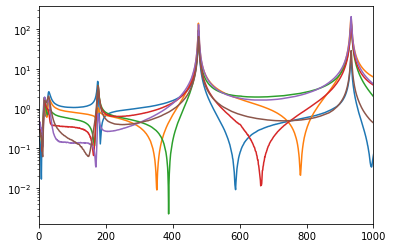

In [5]:
plt.semilogy(freq, np.abs(FRF.T));
plt.xlim(0,1000);

Initiate the pyEMA object:

In [6]:
acc = pyEMA.Model(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

Get the poles:

In [7]:
acc.get_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 140.31it/s]


Select stable poles from the stabilisation chart:

In [16]:
acc.select_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 156.28it/s]


<Figure size 432x288 with 0 Axes>

As an alternative to selecting from the stabilisation chart, the frequencies can be defined as a list, e.g. (comment out to use):

In [17]:
#n_freq =  [176,476,932,1534,2258,3161,4180]
#acc.select_closest_poles(n_freq)

Reconstruction of FRF

In [18]:
frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [19]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.0	0.0087
2)  476.5	0.0018
3)  932.3	0.0016
4) 1534.8	0.0020
5) 2286.3	0.0029
6) 3162.0	0.0018
7) 4181.9	0.0015


Modal constants are of shape (`n_locations` $\times$ `n_frequencies`):

In [20]:
acc.A.shape

(6, 7)

In [21]:
acc.A[:, 0]

array([ 8.36897417-45.05548752j,  0.47299584 +6.22818708j,
       -5.86762787+32.66291794j, -7.5642978 +29.95614539j,
        0.95352405 +5.42487628j,  9.60034126-35.12496528j])

Show normal modes (first three):

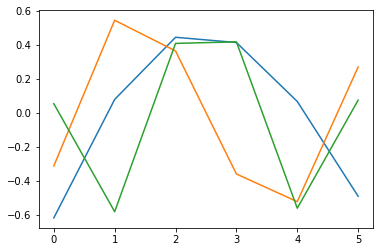

In [22]:
plt.plot(acc.normal_mode()[:, :3]);

Upper and lower residuals can also be called:

In [23]:
acc.UR, acc.LR

(array([-0.68359769-0.01759683j,  3.04810197-0.04782611j,
        -1.03310808+0.08142704j,  0.50946849+0.02101276j,
         0.14550623-0.05994236j, -0.55482119+0.02736587j]),
 array([ 6426.89075141-5839.310471j  ,   613.79781662-4574.35205765j,
          494.69239925-2210.53334236j,  2147.04652946-1389.03563645j,
        -3265.27555889 -853.34030459j, -5208.11245194 +786.30516867j]))

Check out the Auto Modal Assurance Criterion.

In [24]:
autoMAC = acc.autoMAC()

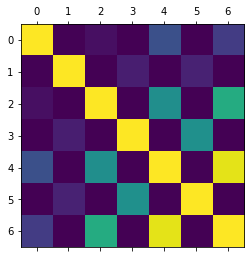

In [25]:
plt.matshow(autoMAC);

Showing the reconstructed FRF

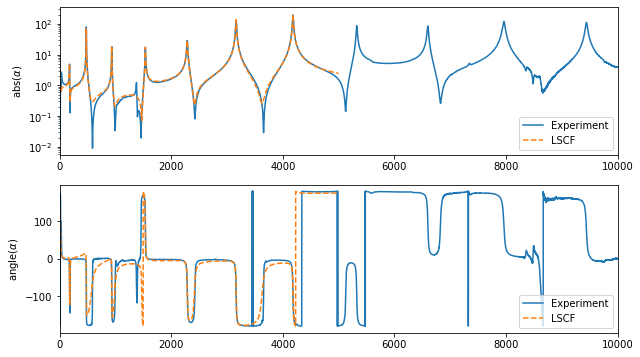

In [26]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best');